In [1]:
!pip install pandas matplotlib requests


In [3]:
import requests
import pandas as pd
import matplotlib.pyplot as plt


In [5]:
countries = ['LTU', 'EUU']
indicator = 'SL.UEM.TOTL.ZS'
years = list(range(2010, 2025))

In [6]:
def fetch_unemployment_data(country_code, indicator):
    url = f"http://api.worldbank.org/v2/country/{country_code}/indicator/{indicator}?format=json&per_page=1000"
    res = requests.get(url)
    data = res.json()[1]
    df = pd.DataFrame(data)
    df = df[['date', 'value']].rename(columns={'date': 'year', 'value': country_code})
    df['year'] = df['year'].astype(int)
    return df[df['year'].isin(years)].sort_values('year')

df_list = [fetch_unemployment_data(code, indicator) for code in countries]
df_merged = df_list[0].merge(df_list[1], on='year')
df_merged.reset_index(drop=True, inplace=True)
df_merged.head()


,year,LTU,EUU
0,2010,17.814,9.872721
1,2011,15.390,9.927600
2,2012,13.365,10.875226
3,2013,11.770,11.349908
4,2014,10.698,10.826669


In [7]:
output_csv = 'unemployment_2010_2024.csv'
df_merged.to_csv(output_csv, index=False)
print("Saved:", output_csv)


Saved: unemployment_2010_2024.csv


In [8]:
def compute_indicators(df):
    df_stats = pd.DataFrame({
        'Country': countries,
        'Average': [df[c].mean() for c in countries],
        'Min': [df[c].min() for c in countries],
        'Max': [df[c].max() for c in countries],
        'Change': [df[c].iloc[-1] - df[c].iloc[0] for c in countries]
    })
    return df_stats

df_indicators = compute_indicators(df_merged)
df_indicators.to_csv('indicators_2010_2024.csv', index=False)
df_indicators


,Country,Average,Min,Max,Change
0,LTU,9.426200,5.95500,17.814000,-10.310000
1,EUU,8.414125,5.91813,11.349908,-3.954591


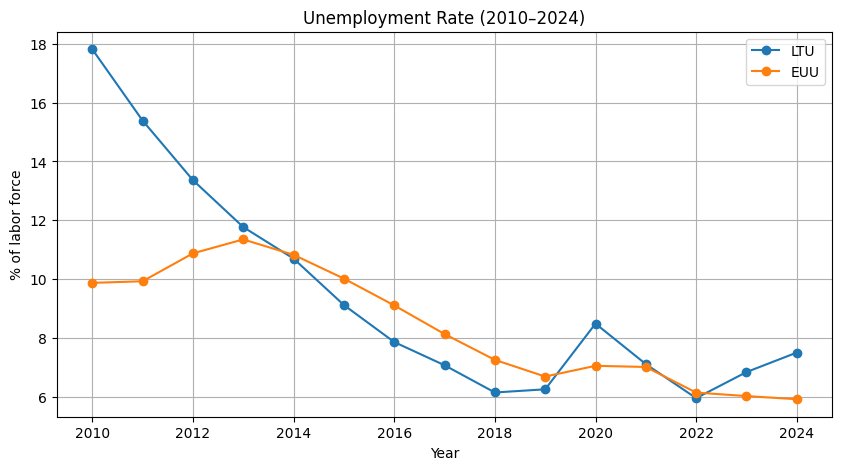

In [9]:
plt.figure(figsize=(10, 5))
for code in countries:
    plt.plot(df_merged['year'], df_merged[code], marker='o', label=code)
plt.title('Unemployment Rate (2010–2024)')
plt.xlabel('Year')
plt.ylabel('% of labor force')
plt.legend()
plt.grid(True)
plt.savefig('unemployment_trend_2010_2024.png')
plt.show()


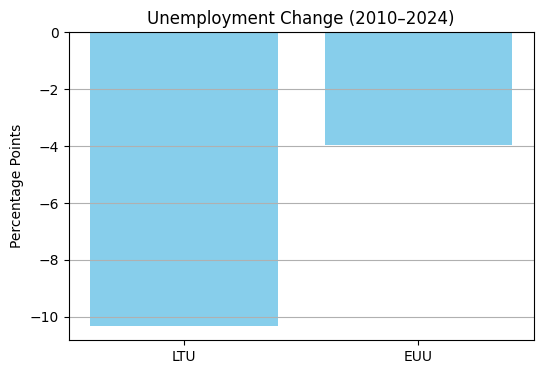

In [10]:
plt.figure(figsize=(6, 4))
plt.bar(df_indicators['Country'], df_indicators['Change'], color='skyblue')
plt.title('Unemployment Change (2010–2024)')
plt.ylabel('Percentage Points')
plt.grid(True, axis='y')
plt.savefig('unemployment_change_2010_2024.png')
plt.show()
